In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crimesonwomen/CrimesOnWomenData.csv


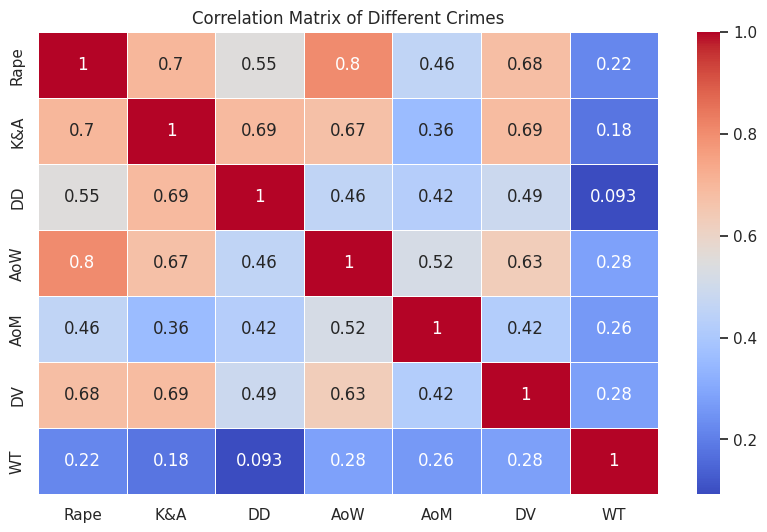

<Figure size 1000x600 with 0 Axes>

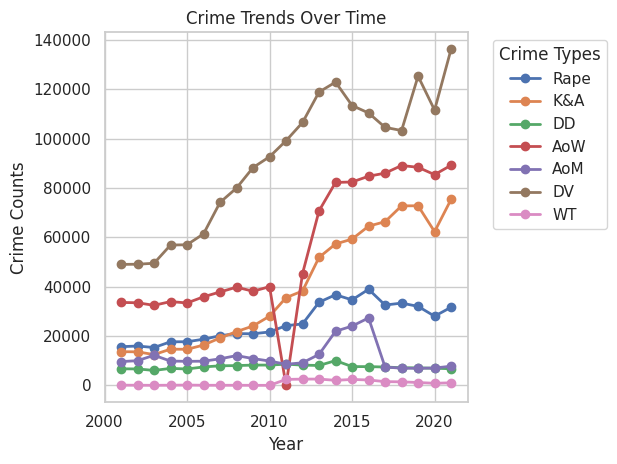

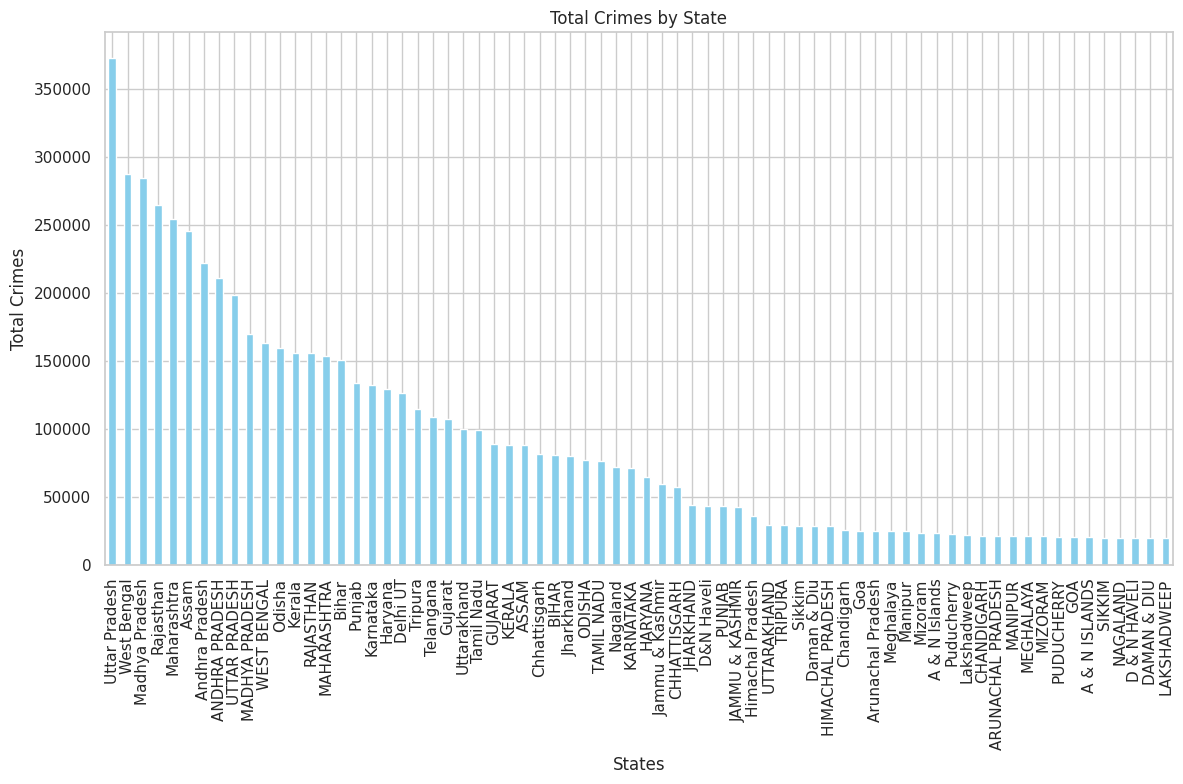

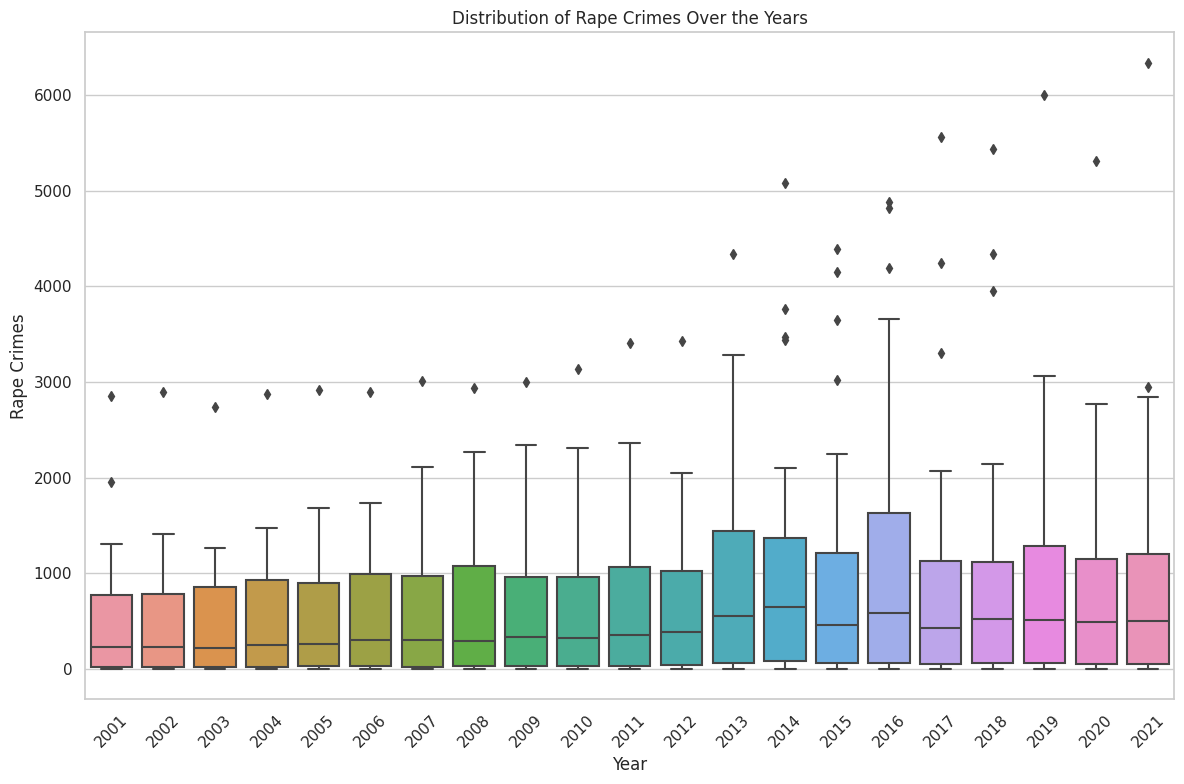

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/kaggle/input/crimesonwomen/CrimesOnWomenData.csv'
df = pd.read_csv(file_path)

# Clean the data by dropping unnecessary columns
df_cleaned = df.drop(columns=['Unnamed: 0'])

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Group data by Year and State
crimes_over_time = df_cleaned.groupby('Year').sum(numeric_only=True)
crimes_by_state = df_cleaned.groupby('State').sum(numeric_only=True)

# Plot the correlation matrix
correlation_matrix = df_cleaned.drop(columns=['Year', 'State']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Different Crimes')
plt.show()

# Crime Trends Over Time (Line Plot)
plt.figure(figsize=(10, 6))
crimes_over_time.plot(kind='line', marker='o', linewidth=2)
plt.title('Crime Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Crime Counts')
plt.legend(title="Crime Types", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Crimes by State (Bar Plot)
plt.figure(figsize=(12, 8))
crimes_by_state.sum(axis=1).sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Total Crimes by State')
plt.xlabel('States')
plt.ylabel('Total Crimes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Crime Distributions Over Years (Box Plot)
plt.figure(figsize=(12, 8))
sns.boxplot(x='Year', y='Rape', data=df_cleaned)  # You can replace 'Rape' with any crime type column
plt.title('Distribution of Rape Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Rape Crimes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

